To get the mass in each pixel, need the excitation temperature, and the 13co column density, using column_density_h2 with molecule='13co', then call mass function with this column_density map input and multiply by the second moment map corrected to 3D for the kinetic energy.

In [109]:
# from spectral_cube import SpectralCube
import numpy as np
from physics import rms
c = SpectralCube.read("../cubes/mask_imfit_13co_pix_2_Tmb.fits")
###Could put a mask on the 13co cube based on SNR HERE! ALSO could mask out the OMC 1 region here.
dec,ra = c.spatial_coordinate_map
mask_no_omc1 = (dec > -5.2591*u.deg) | (dec < -5.529*u.deg)
c = c.with_mask(mask_no_omc1)

rms13 = rms(c, velocity_range=[[0,2], [16,18]]*u.km/u.s, sigma_clipped=True)
print(rms13)
# mask13_5sig = c > 5*rms13
mask13_3sig = c > 3*rms13
# c_5sig = c.with_mask(mask13_5sig)
c_3sig = c.with_mask(mask13_3sig)
sigma_los = c.linewidth_sigma()
sigma_3d = sigma_los*np.sqrt(3)
print(sigma_los, sigma_3d)

/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/base_class.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = [i[view] for i in inds[::-1]]  # numpy -> wcs order


1.0144693851470947 K


/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:219: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data = np.memmap(ntf, mode='w+', shape=data[view].shape,
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:221: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data[:] = data[view]
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:629: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] m / s [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] m / s


In [110]:
# sigma_los_5sig = c_5sig.linewidth_sigma()
# sigma_3d_5sig = sigma_los_5sig*np.sqrt(3)
sigma_los_3sig = c_3sig.linewidth_sigma()
sigma_3d_3sig = sigma_los_3sig*np.sqrt(3)

/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:219: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data = np.memmap(ntf, mode='w+', shape=data[view].shape,
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:221: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data[:] = data[view]
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:629: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

In [111]:
print(rms13)
# import matplotlib.pyplot as plt
# plt.imshow(sigma_3d.data, origin='lower', vmin=0, vmax=5e3)
# plt.colorbar()

1.0144693851470947 K


In [112]:
from physics import column_density_H2, mass, calc_physics
from astropy.io import fits
import astropy.units as u
tex = fits.open("../../carma_orion/tex12.fits")[0]
# nH2 = column_density_H2(c,tex.data*u.K, molecule='13co')

In [113]:
nH2_3sig = column_density_H2(c_3sig, tex.data*u.K, molecule='13co')
# nH2_5sig = column_density_H2(c_5sig, tex.data*u.K, molecule='13co')

/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:219: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data = np.memmap(ntf, mode='w+', shape=data[view].shape,
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:221: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sliced_data[:] = data[view]
/Users/jesse/miniconda3/lib/python3.7/site-packages/spectral_cube/masks.py:629: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

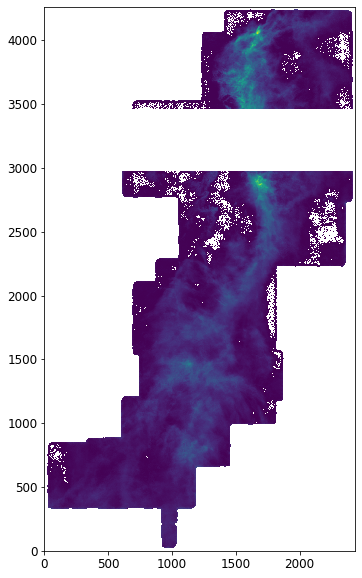

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(nH2_3sig.data,origin='lower')
plt.show()


In [115]:
# kinetic_energy_map = 0.5*mass(nH2, return_map=True)*sigma_3d**2.
kinetic_energy_map_3sig = 0.5*mass(nH2_3sig, return_map=True)*sigma_3d_3sig**2.
# kinetic_energy_map_5sig = 0.5*mass(nH2_5sig, return_map=True)*sigma_3d_5sig**2.

# kinetic_energy_tot = kinetic_energy_map.nansum().value*1.988475e37*u.erg
kinetic_energy_tot_3sig = kinetic_energy_map_3sig.nansum().value*1.988475e37*u.erg
# kinetic_energy_tot_5sig = kinetic_energy_map_5sig.nansum().value*1.988475e37*u.erg



print(kinetic_energy_tot_3sig)
# np.save("kinetic_energy_map", kinetic_energy_map)
np.save('kinetic_energy_map_3sig', kinetic_energy_map_3sig)
# np.save('kinetic_energy_map_5sig', kinetic_energy_map_5sig)

1.6764518234862624e+48 erg


NotImplementedError: cannot write Quantities to file.  Write array with q.value.tofile(...)

In [117]:
d_cloud = 12*u.pc #From Feddersen et al. 2018, geometric average of cloud length and width in the plane of the sky.
np.nanmedian(sigma_los)


<Quantity 1468.32879728 m / s>

In [118]:
t_diss = (0.5*d_cloud/np.nanmedian(sigma_los)).to(u.yr)
t_diss_3sig = (0.5*d_cloud/np.nanmedian(sigma_los_3sig)).to(u.yr)
t_diss_5sig = (0.5*d_cloud/np.nanmedian(sigma_los_5sig)).to(u.yr)
print(t_diss, t_diss_3sig, t_diss_5sig)

3995531.069685462 yr 7294139.650545554 yr 10672552.417016692 yr


In [119]:
print("Total turbulent energy dissipation rate, using only 13co detected at 3-sigma: ", (kinetic_energy_tot_3sig/t_diss).to(u.erg/u.s))

Total turbulent energy dissipation rate, using only 13co detected at 3-sigma:  1.3295742586430108e+34 erg / s


In [121]:
mass_tot_3sig = mass(nH2_3sig, return_map=False)
print(mass_tot_3sig)
dpdt = 6.4e-4*(u.Msun*u.km/u.s/u.yr)*(mass_tot_3sig/(500*u.Msun))*(0.5*d_cloud/(0.5*u.pc))**-1 * (np.nanmedian(sigma_los)/(1*u.km/u.s))**2.
print(dpdt.to(u.Msun*u.km/u.s/u.yr))

48863.99461793519 solMass
0.011237360770035664 km solMass / (s yr)


In [97]:
dec,ra = nH2_3sig.spatial_coordinate_map

In [122]:
a = (dec > -5.2591*u.deg) | (dec < -5.529*u.deg)


In [134]:
print(1920e-6/0.011237360770)
print(7063e-6/0.011237360770)
print(2640e30/1.32957426e34)
print(6900e30/1.32957426e34)

0.17085862412869746
0.628528365740099
0.1985598006387398
0.5189631153057971
